# Lista 1 - Econometria das Séries Financeiras
Ref: Aula 20/4/2016

Bruno Campos

Pedro Mattos #333791

Renata Polete




Prof: Gustavo Soares


Importando algumas bibliotecas que serão utilizadas:

In [62]:
%matplotlib inline

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from pandas.tools.plotting import autocorrelation_plot
from yahoo_finance import Share
import statsmodels as sm

## Item: Crie 5 séries de preço ajustado para 5 ativos de diferentes classes de ativo e calcule os log-returns diários, semanais e mensais da série.

Criando a lista de ações e capturando os preços:

In [2]:
stocks = ['BRPR3.SA','ENBR3.SA','BVMF3.SA','PETR4.SA','VALE5.SA']

prices = pd.DataFrame()
for stock in stocks:
    s = Share(stock).get_historical('2000-01-01', '2015-12-31')
    s = pd.DataFrame(s).pivot_table(index = "Date", columns = "Symbol", values = "Adj_Close",aggfunc = "last")
    prices = pd.concat([prices, s],axis=1)



In [3]:
prices.index = pd.to_datetime(prices.index)    
prices = prices["2006-01-01":]
prices = prices.replace(to_replace='NaN',value=np.nan)
prices = prices.fillna(method='ffill')
# prices = prices.fillna(method='bfill')
prices = prices.convert_objects(convert_numeric=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [4]:
dailyPrices = prices
dailyPrices.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-02,NaN,3.76599,NaN,14.87216,16.07684
2006-01-03,NaN,3.79368,NaN,15.34070,16.75587
2006-01-04,NaN,3.84906,NaN,15.41488,16.94715
2006-01-05,NaN,3.91829,NaN,15.38365,17.06382
2006-01-06,NaN,4.06921,NaN,15.94980,17.03705


In [5]:
weeklyPrices = prices.resample(rule="W").last()
weeklyPrices.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-08,NaN,4.06921,NaN,15.94980,17.03705
2006-01-15,NaN,4.25751,NaN,16.63308,17.69504
2006-01-22,NaN,4.12597,NaN,17.27732,17.96091
2006-01-29,NaN,4.59674,NaN,17.56625,18.47736
2006-02-05,NaN,4.56903,NaN,17.25389,17.67400


In [6]:
monthlyPrices = prices.resample(rule="M").last()
monthlyPrices.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-31,NaN,4.63686,NaN,18.35105,18.70690
2006-02-28,NaN,4.49979,NaN,17.46083,17.29144
2006-03-31,NaN,4.17996,NaN,16.84392,17.88632
2006-04-30,NaN,4.29211,NaN,18.35867,17.69313
2006-05-31,NaN,3.87675,NaN,17.47310,16.84768


In [7]:
dailyReturns = dailyPrices.pct_change()
dailyReturns.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-02,NaN,NaN,NaN,NaN,NaN
2006-01-03,NaN,0.007353,NaN,0.031505,0.042237
2006-01-04,NaN,0.014598,NaN,0.004836,0.011416
2006-01-05,NaN,0.017986,NaN,-0.002026,0.006884
2006-01-06,NaN,0.038517,NaN,0.036802,-0.001569


In [8]:
weeklyReturns = weeklyPrices.pct_change()
weeklyReturns.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-08,NaN,NaN,NaN,NaN,NaN
2006-01-15,NaN,0.046274,NaN,0.042839,0.038621
2006-01-22,NaN,-0.030896,NaN,0.038732,0.015025
2006-01-29,NaN,0.114099,NaN,0.016723,0.028754
2006-02-05,NaN,-0.006028,NaN,-0.017782,-0.043478


In [9]:
monthlyReturns = monthlyPrices.pct_change()
monthlyReturns.head()

Symbol,BRPR3.SA,ENBR3.SA,BVMF3.SA,PETR4.SA,VALE5.SA
2006-01-31,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,-0.029561,NaN,-0.048511,-0.075665
2006-03-31,NaN,-0.071077,NaN,-0.035331,0.034403
2006-04-30,NaN,0.026830,NaN,0.089929,-0.010801
2006-05-31,NaN,-0.096773,NaN,-0.048237,-0.047784


# Item: Estatísticas Descritivas e hipótese de log normalidade

## Daily Returns

In [22]:
dailyReturns.mean()

Symbol
BRPR3.SA    0.000308
ENBR3.SA    0.000654
BVMF3.SA    0.000337
PETR4.SA    0.000034
VALE5.SA    0.000110
dtype: float64

In [23]:
dailyReturns.skew()

Symbol
BRPR3.SA    0.134271
ENBR3.SA    0.194469
BVMF3.SA    0.189159
PETR4.SA    0.227549
VALE5.SA    0.136003
dtype: float64

In [24]:
dailyReturns.kurt()

Symbol
BRPR3.SA    2.419748
ENBR3.SA    2.693506
BVMF3.SA    1.120494
PETR4.SA    3.724426
VALE5.SA    3.783333
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008B01198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009298FD0>]], dtype=object)

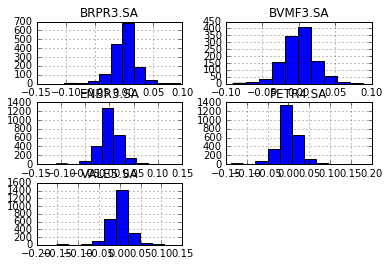

In [25]:
dailyReturns.hist()

As médias são muito próximas de zero, o que corrobora com a hipótese de log normalidade. Porém as assimetrias são positivas. As curtoses são razoavelmente diferente de 3 para todos os ativos.

## Weekly Returns

In [26]:
weeklyReturns.mean()

Symbol
BRPR3.SA    0.001296
ENBR3.SA    0.002903
BVMF3.SA    0.001769
PETR4.SA   -0.000143
VALE5.SA    0.000212
dtype: float64

In [27]:
weeklyReturns.skew()

Symbol
BRPR3.SA   -0.009248
ENBR3.SA    0.173600
BVMF3.SA    0.090321
PETR4.SA   -0.040946
VALE5.SA    0.415477
dtype: float64

In [28]:
weeklyReturns.kurt()

Symbol
BRPR3.SA    0.765345
ENBR3.SA    1.222890
BVMF3.SA    0.771828
PETR4.SA    1.610172
VALE5.SA    2.185269
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000939EF60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000096EA8D0>]], dtype=object)

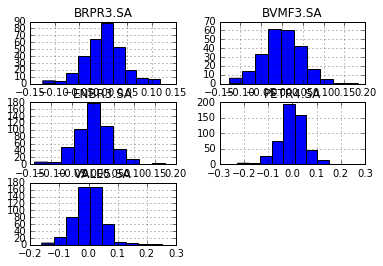

In [29]:
weeklyReturns.hist()

As médias são muito próximas de zero, o que corrobora com a hipótese de log normalidade. As assimetrias são próximas de zero também, exceto por ENBR3 e VALE5. Porém as caudas são todas mais leves do que a normal.

## Monthly Returns

In [30]:
monthlyReturns.mean()

Symbol
BRPR3.SA    0.005648
ENBR3.SA    0.010418
BVMF3.SA    0.006405
PETR4.SA   -0.002410
VALE5.SA   -0.001394
dtype: float64

In [31]:
monthlyReturns.skew()

Symbol
BRPR3.SA    0.608098
ENBR3.SA    0.052785
BVMF3.SA   -0.059387
PETR4.SA    0.038654
VALE5.SA    0.210973
dtype: float64

In [32]:
monthlyReturns.kurt()

Symbol
BRPR3.SA    1.642662
ENBR3.SA   -0.056832
BVMF3.SA   -0.568101
PETR4.SA    0.577951
VALE5.SA    0.726542
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B28F828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B3DEEB8>]], dtype=object)

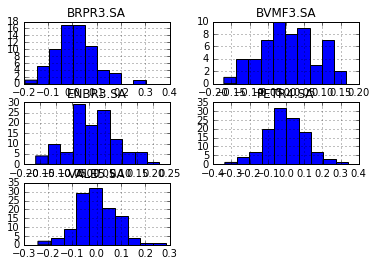

In [33]:
monthlyReturns.hist()

As médias são muito próximas de zero, o que corrobora com a hipótese de log normalidade. As assimetruas de BRPR3 e VALE5 são distantes de zero e as caudas são todas bastante leves.

## Conclusão

A hipótese de log-normalidade não parece ser válida. Porém encotramos o fato estilizado de que as médias são ligeiramente positivas, não encontramos muitas assimetrias negativas e surpreendentemente encontramos curtoses mais leves.

a hipótese de log-normalidade é ainda assim utilizada pois em diversos casos e modelos é muito difícil encontrar uma solução analítica sem assumir esta hipótese como verdadeira.

# Item: Calcule a FAC dos log-retornos diários, semanais e mensais e ajuste um modelo ARIMA


## Autocorrelação

In [54]:
def plotAutoCorr(returns):
    for stock in returns.columns:
        plt.figure()
        plt.title(stock)
        autocorrelation_plot(returns[stock].dropna()) 

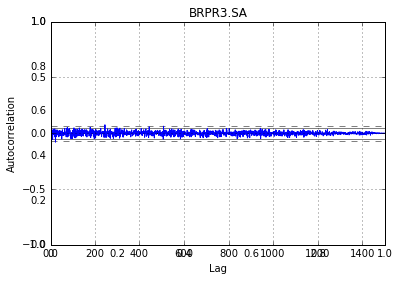

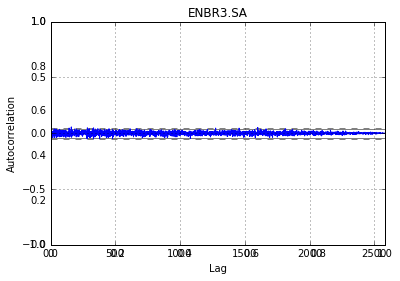

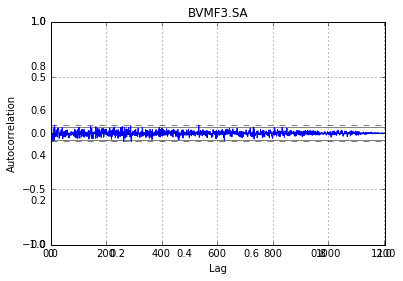

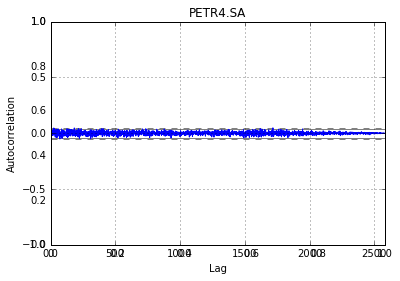

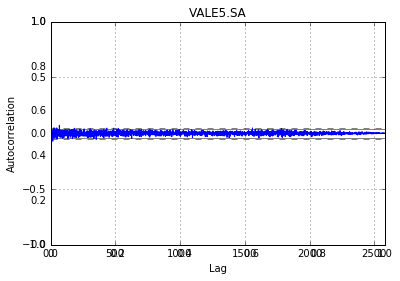

In [55]:
plotAutoCorr(dailyReturns)

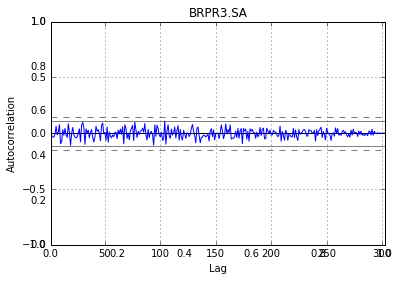

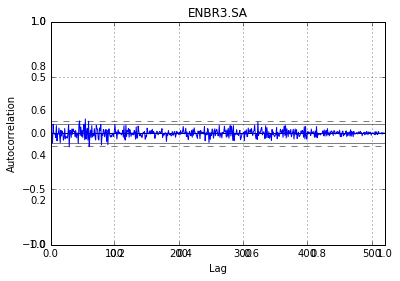

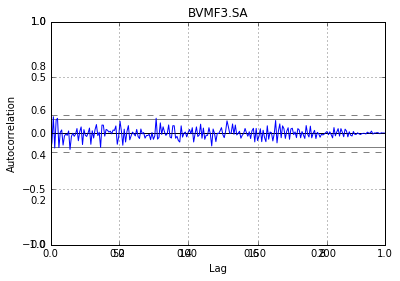

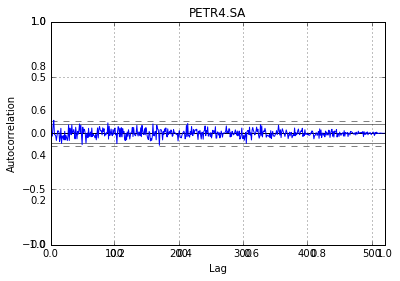

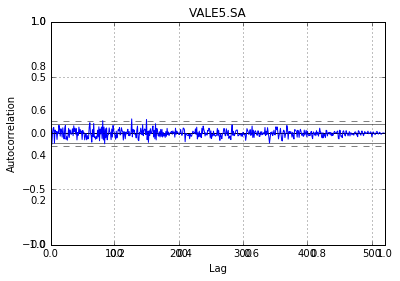

In [56]:
plotAutoCorr(weeklyReturns)

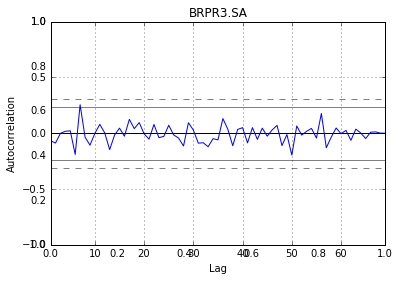

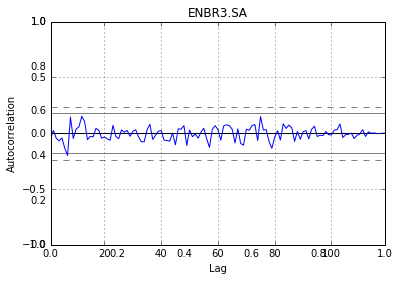

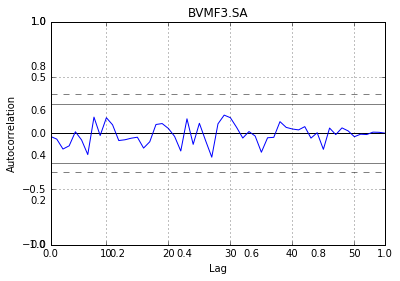

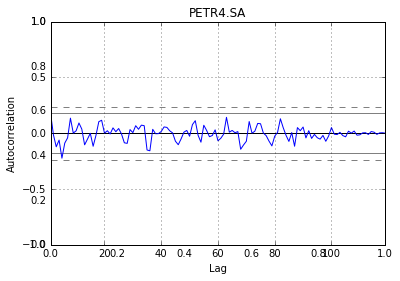

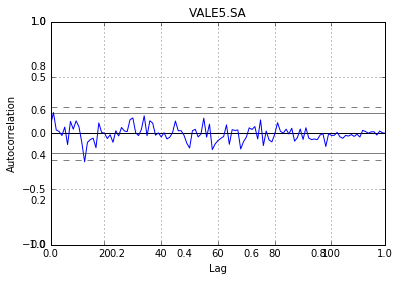

In [57]:
plotAutoCorr(monthlyReturns)

Podemos observar que em quase todos os casos a autocorrelação não é estatísticamente diferente de zero. Exceto por alguns casos pontuais que não possuem interpretação lógica. Consideramos estes casos como aleatoriedade.

## ARIMA Model

In [67]:
def estimateArima(data,p,d=0,q=0):
    model = sm.tsa.arima_model.ARIMA(data.dropna(), (p,d,q)).fit()
    print(model.summary())
    


                              ARMA Model Results                              
Dep. Variable:               BRPR3.SA   No. Observations:                 1504
Model:                     ARMA(2, 0)   Log Likelihood                3794.860
Method:                       css-mle   S.D. of innovations              0.019
Date:                Wed, 27 Apr 2016   AIC                          -7581.721
Time:                        13:36:42   BIC                          -7560.457
Sample:                    03-09-2010   HQIC                         -7573.800
                         - 12-31-2015                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              0.0003      0.000      0.645      0.519        -0.001     0.001
ar.L1.BRPR3.SA    -0.0757      0.026     -2.936      0.003        -0.126    -0.025
ar.L2.BRPR3.SA     0.0274      0.026